Exercise 1. Denoise moon landing image

In [1]:
import numpy as np
from scipy import fftpack
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

img = plt.imread("http://members.cbio.mines-paristech.fr/~nvaroquaux/formations/scipy-lecture-notes/_images/moonlanding.png")

plt.figure()
plt.imshow(img)
plt.show()


<Figure size 640x480 with 1 Axes>

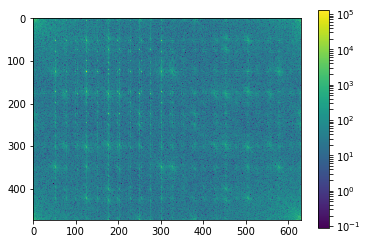

In [2]:
plt.figure()
fft = fftpack.fft2(img)
plt.imshow(np.abs(fft),norm=LogNorm())
plt.colorbar()
plt.show()

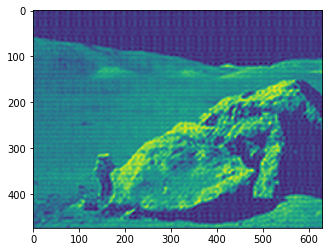

In [3]:
fft_new = fft
fft_new[fft.shape[0]//10:(fft.shape[0]*9)//10]=0
fft_new[:,fft.shape[1]//10 : (fft.shape[1]*9)//10]=0
new = fftpack.ifft2(fft_new).real

plt.figure()
plt.imshow(new)
plt.show()

Exercise 2. Curve fitting of temperature data

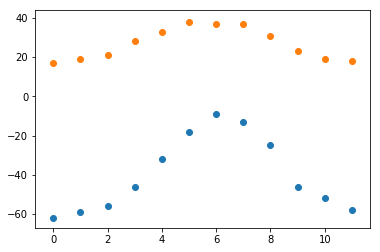

In [4]:
import matplotlib.pyplot as plt
from scipy import optimize

tmin = [-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58]
tmax = [17, 19, 21, 28, 33, 38, 37, 37, 31, 23, 19, 18]
dat = np.arange(12)

plt.scatter(dat,tmin)
plt.scatter(dat,tmax)
plt.show()

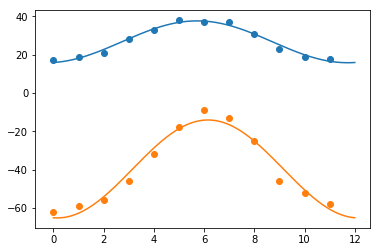

In [5]:
def func(x, a, b, c):
    return a + b*np.cos((x+c)*np.pi/6)
new_max = optimize.curve_fit(func, dat, tmax, [-60,40,0])[0]
new_min = optimize.curve_fit(func, dat, tmin, [-60,40,0])[0]

plt.figure()
day = np.arange(0,12,12/365)
plt.scatter(dat, tmax)
plt.plot(day, func(day,*new_max))
plt.scatter(dat, tmin)
plt.plot(day, func(day,*new_min))
plt.show()

Exercise 3. 2-D-minimization

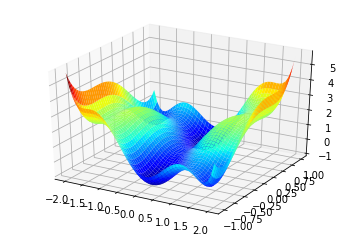

array([-0.08984141,  0.71265608, -1.        ,  1.        ])

In [6]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LogNorm

def func(x):
    return (4 - 2.1*x[0]**2 + x[0]**4 / 3.) * x[0]**2 + x[0] * x[1] + (-4 + \
        4*x[1]**2) * x[1] **2

x = np.linspace(-2, 2)
y = np.linspace(-1, 1)
xgr, ygr = np.meshgrid(x, y)

fig = plt.figure()
cr = fig.add_subplot(111, projection='3d')
surf = cr.plot_surface(xgr, ygr, func([xgr, ygr]), cmap=plt.cm.jet)

plt.show()

res = optimize.minimize(func,[(-2,2),(-1,1)])
res.x

Exercise 4. Probability distributions

In [7]:
from scipy import stats
import pylab as pl
a = np.random.gamma(1,1,1000)
print(a.max())
bins = np.linspace(0,10,100)
b = stats.gamma.pdf(bins,1)
pl.hist(a,bins, density = True)
pl.plot(bins,b)
pl.show()

6.8878436351926


Exercise 5. Image filtering

In [8]:
from scipy import ndimage
from scipy import misc
from scipy import signal
import numpy as np
lena = plt.imread('http://members.cbio.mines-paristech.fr/~nvaroquaux/formations/scipy-lecture-notes/_images/lena.png')
noisy_lena = np.copy(lena).astype(np.float)
noisy_lena += lena.std()*0.5*np.random.standard_normal(lena.shape)
blurred_lena = ndimage.gaussian_filter(noisy_lena, sigma=3)
median_lena = ndimage.median_filter(blurred_lena, size=5)
wiener_lena = signal.wiener(blurred_lena, (5,5))

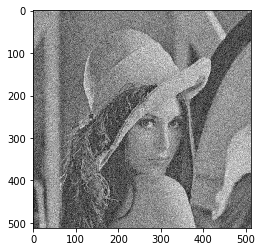

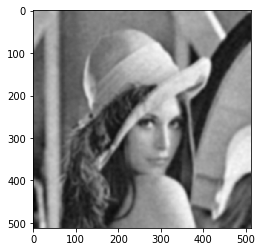

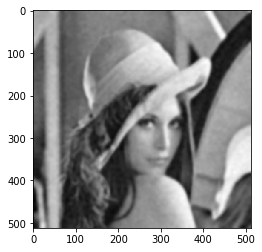

In [9]:
plt.imshow(noisy_lena,plt.cm.gray)
plt.show()
plt.imshow(blurred_lena,plt.cm.gray)
plt.show()
plt.imshow(median_lena,plt.cm.gray)
plt.show()
plt.imshow(wiener_lena,plt.cm.gray)
plt.show()

Exercise 6. Mathematical morphology, pt1

In [10]:
a = np.zeros((7, 7), dtype=np.int)
a[1:6, 2:5] = 1
b = ndimage.binary_erosion(a).astype(a.dtype)
c = ndimage.binary_dilation(b).astype(a.dtype)
d = ndimage.binary_opening(a).astype(np.int)
print(c)
print(d)
np.array_equal(c,d)

[[0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0]
 [0 0 1 1 1 0 0]
 [0 0 1 1 1 0 0]
 [0 0 1 1 1 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0]]
[[0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0]
 [0 0 1 1 1 0 0]
 [0 0 1 1 1 0 0]
 [0 0 1 1 1 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0]]


True

Exercise 7. Mathematical morphology, pt2

In [11]:
a = np.zeros((50, 50))
a[10:-10, 10:-10] = 1
b = a + 0.25*np.random.standard_normal(a.shape)
mask = b>=0.5
opened_mask = ndimage.binary_opening(mask)
closed_mask = ndimage.binary_closing(opened_mask)
print(a[closed_mask].sum())
print(a.sum())

887.0
900.0
